In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('nba.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [5]:
df.shape

(457, 9)

In [6]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [8]:
print(f'{df['Weight'].mean(): .2f} lbs')


 221.52 lbs


<Axes: title={'center': 'Weight Density chart'}, ylabel='Density'>

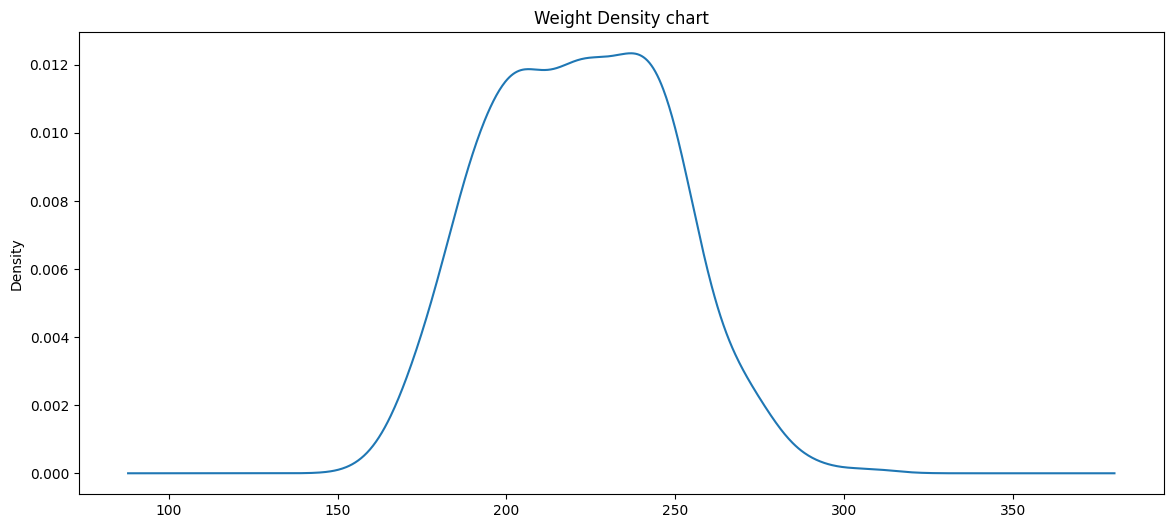

In [9]:
df['Weight'].plot(kind='kde', figsize=(14,6), xlabel='Weight(lbs)', title='Weight Density chart')

<Axes: title={'center': 'Weight box plot'}, xlabel='Weight (lbs)'>

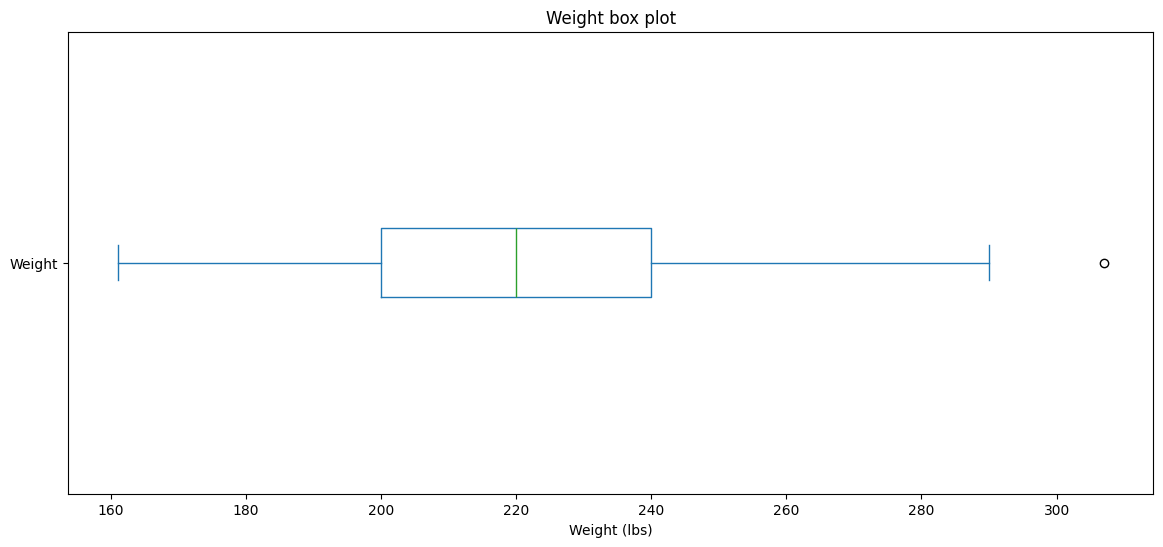

In [10]:
df['Weight'].plot(kind='box', title='Weight box plot', figsize=(14,6), vert=False, xlabel='Weight (lbs)')

In [11]:
print(f' Mean salary: US ${df["Salary"].mean(): ,.2f}')
print(f' Highest salary: US ${df["Salary"].max(): ,.2f}')


 Mean salary: US $ 4,842,684.11
 Highest salary: US $ 25,000,000.00


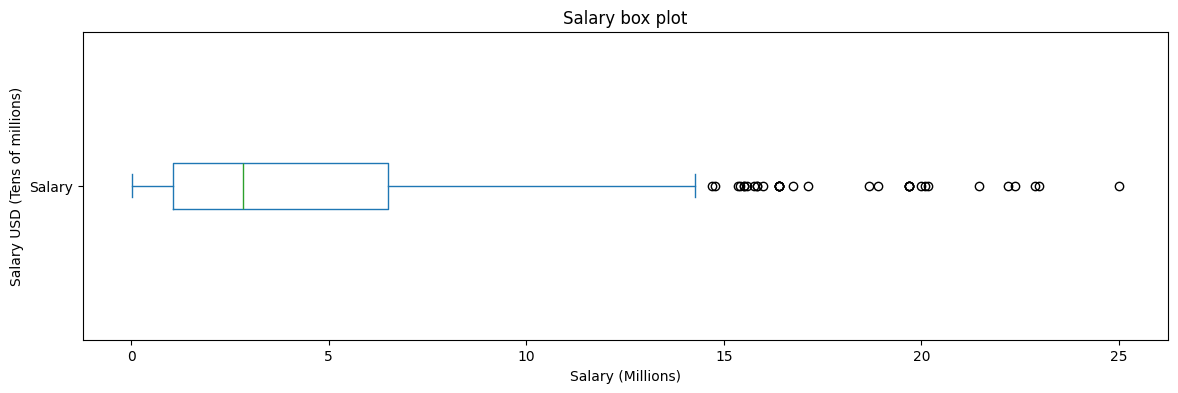

In [12]:
ax = df['Salary'].plot(kind='box', ylabel='Salary USD (Tens of millions)', vert=False, figsize=(14, 4), title='Salary box plot', xlabel='Salary (Millions)')

def millions_formatter(x, pos):
    return f'{x / 10**6:.0f}'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

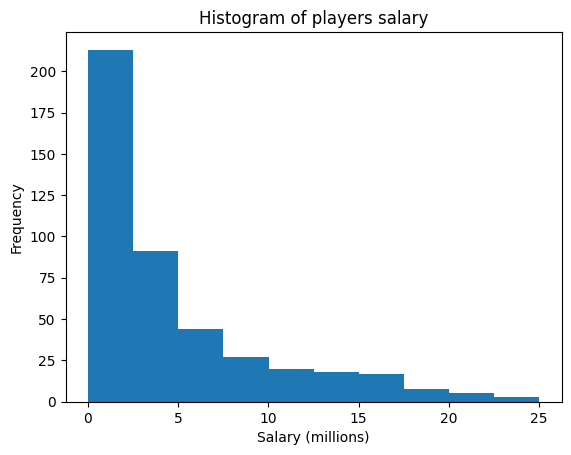

In [13]:
ax = df['Salary'].plot(kind='hist', xlabel='Salary (millions)', title='Histogram of players salary')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

<Axes: title={'center': 'Total salary by position'}, ylabel='Salary'>

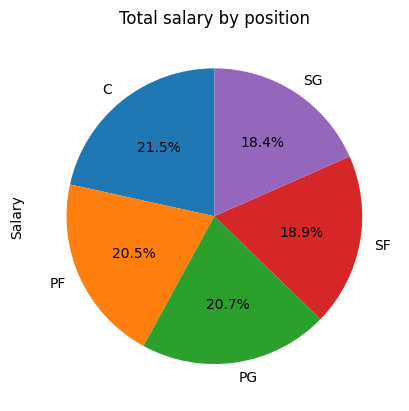

In [14]:
salary_by_position = df.groupby('Position')['Salary'].sum()

salary_by_position.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Total salary by position')

AttributeError: 'Axes' object has no attribute 'value_counts'

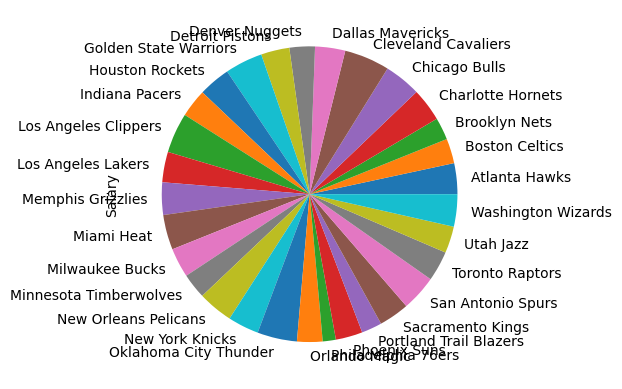

In [20]:
salary_by_team = df.groupby('Team')['Salary'].sum()

salary_by_team.plot(kind='pie')

<Axes: title={'center': 'Salary by age'}, ylabel='Salary'>

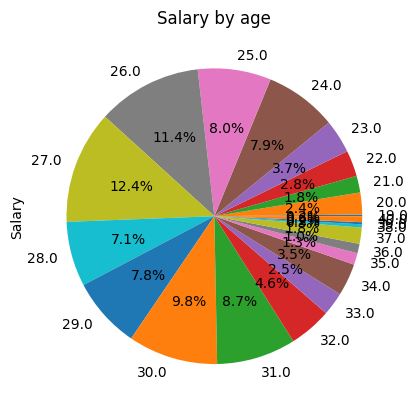

In [16]:
salaries_by_age = df.groupby('Age')['Salary'].sum() 

salaries_by_age.plot(kind='pie', autopct='%1.1f%%', title='Salary by age')

In [17]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


Text(0.5, 0, 'Number of players')

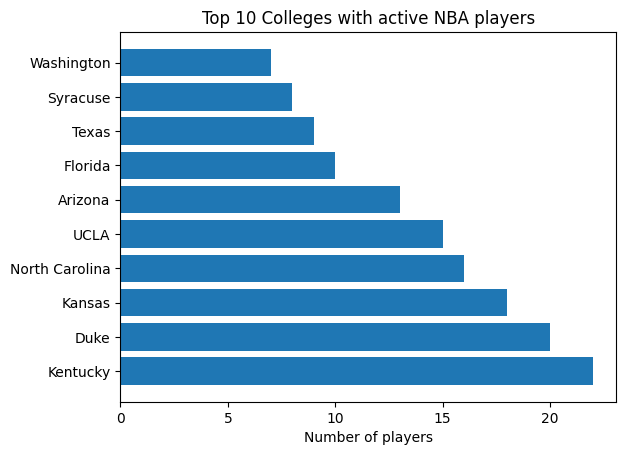

In [38]:
#Get college attended column
college_attended = df['College'].value_counts()

#Get top 10 colleges with the highest number of active players
top5_colleges = college_attended.head(10)

#Plot bar graph of top 10 colleges
#top5_colleges.plot(kind='bar', title='Top 10 Colleges with active NBA players', ylabel='Number of Players')
plt.barh(top5_colleges.index, top5_colleges.values )
plt.title('Top 10 Colleges with active NBA players')
plt.xlabel('Number of players')

In [39]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [51]:
#Spilit the height column into feet and inches
split_height = df['Height'].str.split('-', expand=True)

split_height.columns = ['Feet', 'Inches']

feet_to_inches = split_height['Feet'] * 12
feet_to_inches

0      666666666666
1      666666666666
2      666666666666
3      666666666666
4      666666666666
           ...     
452    666666666666
453    666666666666
454    666666666666
455    777777777777
456    777777777777
Name: Feet, Length: 457, dtype: object